**Diabetes detection using ML algorithm**

In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
dataset = pd.read_csv('diabetes.csv')

In [ ]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [ ]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [ ]:
# Features data-type
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Encoding Categorical Features
scale_mapper = {"Yes":1, "No": 0}
dataset["Outcome"] = dataset["Outcome"].replace(scale_mapper)

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Replacing Zero with Nan
cols = ["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]
dataset[cols] = dataset[cols].replace(['0', 0], np.nan)

In [ ]:
# Count of NaN
dataset.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#Mean Imputation

for i in dataset.columns[dataset.isnull().any(axis=0)]:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

In [ ]:
# Count of NaN
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

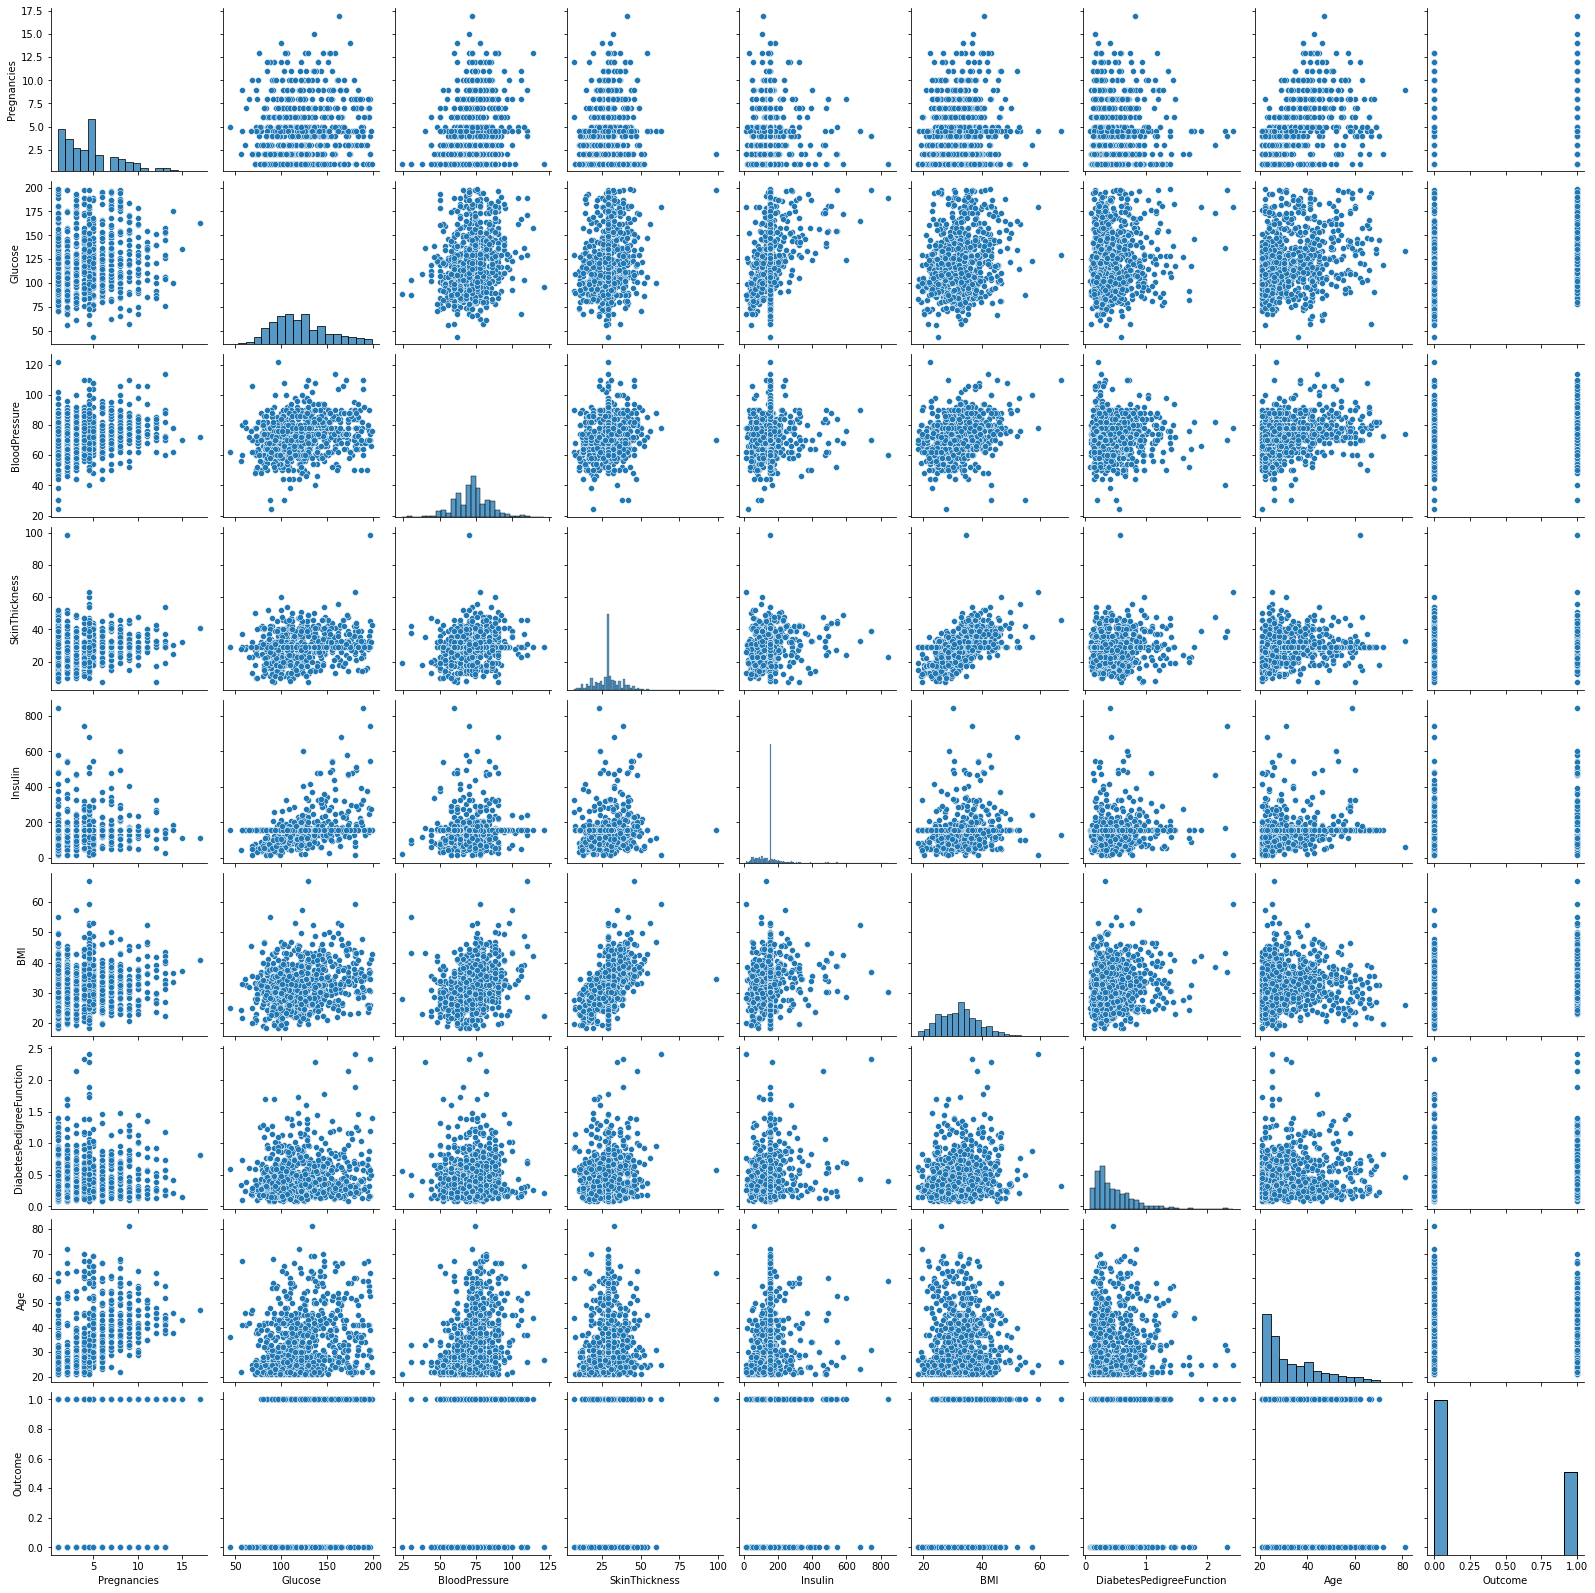

In [ ]:
sns.pairplot(dataset)

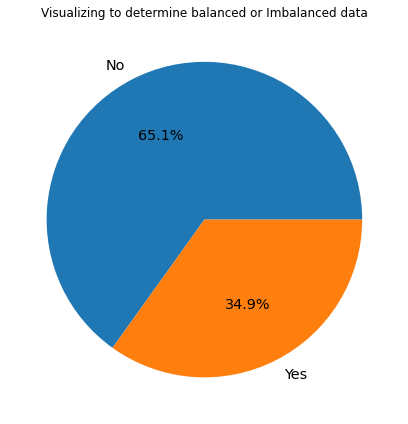

In [ ]:
#Visualizing to determine balance or Imbalanced data

x = dataset['Outcome'].value_counts()
labels = ['No', 'Yes']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%', textprops={'size': 'x-large'})
ax.set_title('Visualizing to determine balanced or Imbalanced data')
plt.tight_layout()

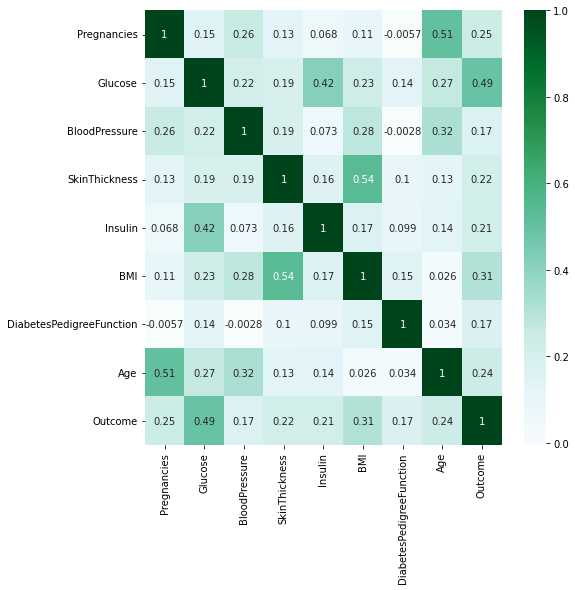

In [ ]:
#Correlation Matrix

plt.figure(figsize=(8,8)) 
sns.heatmap(dataset.corr(), cmap='BuGn', annot = True)
plt.show()

**SMOTE for imbalanced Data**

In [ ]:
X = dataset.drop('Outcome',axis='columns')
y = dataset['Outcome']

y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
#Splitting the dataset into train, test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
#scale train data#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
#transform train data#
X_train = scaler.transform(X_train)

In [ ]:
#transform test data#
X_test = scaler.transform(X_test)

**Fitting the dataset into the ML model**

In [ ]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [ ]:

# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Gaussian Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [ ]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

**Model Evaluation**

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [ ]:
#Evaluating using Precision
from sklearn import metrics

precision_logreg = metrics.precision_score(Y_test, Y_pred_logreg)
precision_knn = metrics.precision_score(Y_test, Y_pred_knn)
precision_svc = metrics.precision_score(Y_test, Y_pred_svc)
precision_nb = metrics.precision_score(Y_test, Y_pred_nb)
precision_dectree = metrics.precision_score(Y_test, Y_pred_dectree)
precision_ranfor = metrics.precision_score(Y_test, Y_pred_ranfor)


In [ ]:
#Evaluating using Recall
from sklearn import metrics

recall_logreg = metrics.recall_score(Y_test, Y_pred_logreg)
recall_knn = metrics.recall_score(Y_test, Y_pred_knn)
recall_svc = metrics.recall_score(Y_test, Y_pred_svc)
recall_nb = metrics.recall_score(Y_test, Y_pred_nb)
recall_dectree = metrics.recall_score(Y_test, Y_pred_dectree)
recall_ranfor = metrics.recall_score(Y_test, Y_pred_ranfor)

In [ ]:
# Accuracy on test set
print(f"Logistic Regression: \n Accuracy {accuracy_logreg * 100}\n Precision {precision_logreg *100:.1f}\n Recall {recall_logreg * 100}\n")

print(f"K Nearest neighbors: \n Accuracy {accuracy_knn * 100}\n Precision {precision_knn *100:.1f}\n Recall {recall_knn * 100}\n")

print(f"Support Vector Classifier: \n Accuracy {accuracy_svc * 100}\n Precision {precision_svc *100:.1f}\n Recall {recall_svc * 100}\n")

print(f"Naive Bayes: \n Accuracy {accuracy_nb * 100}\n Precision {precision_nb *100:.1f}\n Recall {recall_nb * 100}\n")

print(f"Decision tree: \n Accuracy {accuracy_dectree * 100}\n Precision {precision_dectree *100:.1f}\n Recall {recall_dectree * 100}\n")

print(f"Random Forest: \n Accuracy {accuracy_ranfor * 100}\n Precision {precision_ranfor *100:.1f}\n Recall {recall_ranfor * 100}\n")


Logistic Regression: 
 Accuracy 79.0
 Precision 80.2
 Recall 77.0

K Nearest neighbors: 
 Accuracy 77.0
 Precision 73.3
 Recall 85.0

Support Vector Classifier: 
 Accuracy 78.0
 Precision 78.6
 Recall 77.0

Naive Bayes: 
 Accuracy 73.0
 Precision 73.5
 Recall 72.0

Decision tree: 
 Accuracy 77.0
 Precision 76.5
 Recall 78.0

Random Forest: 
 Accuracy 80.5
 Precision 80.8
 Recall 80.0

